## Importing the Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

# Setting to make numbers easier to read on display
pd.options.display.float_format = '{:20.2f}'.format

# Show all columns on output
pd.set_option('display.max_columns', 999)

## Data Exploration

In [8]:
df = pd.read_csv("C:/Users/HP/Downloads/sales_2022.csv")

df.head(10)

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date
0,710,C729,Bob,1/01/2022,Low,SKU356,42,3.58,0.01,5.47,Regular Air,Small Box,5/01/2022
1,710,C729,Bob,1/01/2022,Low,SKU117,11,41.32,0.09,8.66,Regular Air,Medium Box,3/01/2022
2,710,C729,Bob,1/01/2022,Low,SKU1123,29,145.45,0.02,17.85,Delivery Truck,Jumbo Drum,5/01/2022
3,59174,C260,John,1/01/2022,Medium,SKU1134,6,204.10,0.09,13.99,Express Air,Medium Box,3/01/2022
4,39841,C084,John,1/01/2022,Medium,SKU627,43,6.68,0.01,6.92,Regular Air,Small Box,3/01/2022
5,48480,C692,John,2/01/2022,Critical,SKU949,32,370.98,0.10,99.00,Delivery Truck,Jumbo Drum,5/01/2022
6,54145,C398,John,2/01/2022,Low,SKU152,34,2.08,0.10,5.33,Regular Air,Small Box,2/01/2022
7,25860,C258,Bob,2/01/2022,Low,SKU471,9,83.98,0.05,5.01,Express Air,Small Box,4/01/2022
8,25860,C258,John,2/01/2022,Low,SKU1218,23,65.99,0.07,19.99,Regular Air,Small Box,11/01/2022
9,38215,C227,Richard,2/01/2022,Critical,SKU1138,42,20.99,0.07,4.81,Regular Air,Medium Box,3/01/2022


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2142 entries, 0 to 2141
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Order ID           2142 non-null   int64  
 1   Customer ID        2142 non-null   object 
 2   SalesPerson        2142 non-null   object 
 3   Order Date         2142 non-null   object 
 4   Order Priority     2142 non-null   object 
 5   SKU                2142 non-null   object 
 6   Order Quantity     2142 non-null   int64  
 7   Unit Sell Price    2142 non-null   float64
 8   Discount           2142 non-null   float64
 9   Shipping Amount    2142 non-null   float64
 10  Ship Mode          2142 non-null   object 
 11  Product Container  2142 non-null   object 
 12  Ship Date          2142 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 217.7+ KB


In [12]:
df['Order Date'] = pd.to_datetime(df['Order Date'], format = 'mixed')

In [14]:
# Calculate Revenue
df['Revenue'] = df['Order Quantity'] * df['Unit Sell Price'] * (1 - df['Discount'])

# Display the DataFrame with Revenue
print(df)

      Order ID Customer ID SalesPerson Order Date Order Priority      SKU  \
0          710        C729         Bob 2022-01-01            Low   SKU356   
1          710        C729         Bob 2022-01-01            Low   SKU117   
2          710        C729         Bob 2022-01-01            Low  SKU1123   
3        59174        C260        John 2022-01-01         Medium  SKU1134   
4        39841        C084        John 2022-01-01         Medium   SKU627   
...        ...         ...         ...        ...            ...      ...   
2137     19556        C144     Richard 2022-12-30  Not Specified  SKU1146   
2138     43392        C242     Richard 2022-12-31         Medium   SKU481   
2139     18530        C312         Bob 2022-12-31  Not Specified   SKU094   
2140     18530        C312         Bob 2022-12-31  Not Specified  SKU1209   
2141     28262        C114         Bob 2022-12-31         Medium   SKU612   

      Order Quantity      Unit Sell Price             Discount  \
0        

In [16]:
df.describe()

,Order ID,Order Date,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Revenue
count,2142.00,2142,2142.00,2142.00,2142.00,2142.00,2142.00
mean,29155.23,2022-07-08 20:49:44.873949440,25.39,75.76,0.05,12.76,1636.47
min,3.00,2022-01-01 00:00:00,1.00,0.99,0.00,0.49,2.37
25%,14056.25,2022-04-11 00:00:00,13.00,6.54,0.02,3.30,135.47
50%,28995.00,2022-07-12 00:00:00,25.00,20.99,0.05,6.12,432.54
75%,43526.00,2022-10-03 18:00:00,38.00,80.98,0.08,13.99,1580.88
max,59943.00,2022-12-31 00:00:00,50.00,6783.02,0.11,110.20,27929.53
std,17125.29,NaN,14.35,214.62,0.03,16.85,3206.69


In [18]:
df.describe(include='O')

,Customer ID,SalesPerson,Order Priority,SKU,Ship Mode,Product Container,Ship Date
count,2142,2142,2142,2142,2142,2142,2142
unique,643,3,5,989,3,7,375
top,C131,Bob,Low,SKU014,Regular Air,Small Box,13/05/2022
freq,14,746,483,9,1603,1112,13


In [26]:
df.isna().sum()

Order ID             0
Customer ID          0
SalesPerson          0
Order Date           0
Order Priority       0
SKU                  0
Order Quantity       0
Unit Sell Price      0
Discount             0
Shipping Amount      0
Ship Mode            0
Product Container    0
Ship Date            0
Revenue              0
dtype: int64

In [30]:
df[df["Customer ID"].str.startswith("C")]

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Revenue
0,710,C729,Bob,2022-01-01,Low,SKU356,42,3.58,0.01,5.47,Regular Air,Small Box,5/01/2022,148.86
1,710,C729,Bob,2022-01-01,Low,SKU117,11,41.32,0.09,8.66,Regular Air,Medium Box,3/01/2022,413.61
2,710,C729,Bob,2022-01-01,Low,SKU1123,29,145.45,0.02,17.85,Delivery Truck,Jumbo Drum,5/01/2022,4133.69
3,59174,C260,John,2022-01-01,Medium,SKU1134,6,204.10,0.09,13.99,Express Air,Medium Box,3/01/2022,1114.39
4,39841,C084,John,2022-01-01,Medium,SKU627,43,6.68,0.01,6.92,Regular Air,Small Box,3/01/2022,284.37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2137,19556,C144,Richard,2022-12-30,Not Specified,SKU1146,35,115.99,0.08,4.23,Regular Air,Small Box,27/01/2023,3734.88
2138,43392,C242,Richard,2022-12-31,Medium,SKU481,39,162.93,0.03,19.99,Regular Air,Small Box,2/01/2023,6163.64
2139,18530,C312,Bob,2022-12-31,Not Specified,SKU094,2,20.28,0.02,14.39,Regular Air,Small Box,31/12/2022,39.75
2140,18530,C312,Bob,2022-12-31,Not Specified,SKU1209,25,65.99,0.00,5.99,Regular Air,Small Box,2/01/2023,1649.75


In [32]:
df[df["SalesPerson"].str.contains("^Bob")]

,Order ID,Customer ID,SalesPerson,Order Date,Order Priority,SKU,Order Quantity,Unit Sell Price,Discount,Shipping Amount,Ship Mode,Product Container,Ship Date,Revenue
0,710,C729,Bob,2022-01-01,Low,SKU356,42,3.58,0.01,5.47,Regular Air,Small Box,5/01/2022,148.86
1,710,C729,Bob,2022-01-01,Low,SKU117,11,41.32,0.09,8.66,Regular Air,Medium Box,3/01/2022,413.61
2,710,C729,Bob,2022-01-01,Low,SKU1123,29,145.45,0.02,17.85,Delivery Truck,Jumbo Drum,5/01/2022,4133.69
7,25860,C258,Bob,2022-02-01,Low,SKU471,9,83.98,0.05,5.01,Express Air,Small Box,4/01/2022,718.03
10,38215,C227,Bob,2022-02-01,Critical,SKU572,38,104.85,0.09,19.99,Express Air,Small Box,4/01/2022,3625.71
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2134,353,C217,Bob,2022-12-30,Low,SKU815,21,2.21,0.02,1.00,Regular Air,Wrap Bag,31/03/2023,45.48
2136,19556,C144,Bob,2022-12-30,Not Specified,SKU636,22,55.98,0.09,4.86,Regular Air,Small Box,10/01/2023,1120.72
2139,18530,C312,Bob,2022-12-31,Not Specified,SKU094,2,20.28,0.02,14.39,Regular Air,Small Box,31/12/2022,39.75
2140,18530,C312,Bob,2022-12-31,Not Specified,SKU1209,25,65.99,0.00,5.99,Regular Air,Small Box,2/01/2023,1649.75


In [34]:
aggregated_df = df.groupby(by="Customer ID", as_index=False) \
    .agg(
        MonetaryValue=("Revenue", "sum"),
        Frequency=("Order ID", "nunique"),
        LastInvoiceDate=("Order Date", "max")
    )

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate
0,C001,7805.04,2,2022-09-11
1,C002,4280.59,2,2022-05-26
2,C003,37.56,1,2022-04-12
3,C004,81.00,2,2022-07-03
4,C005,2547.93,3,2022-11-11


In [40]:
max_invoice_date = aggregated_df["LastInvoiceDate"].max()

aggregated_df["Recency"] = (max_invoice_date - aggregated_df["LastInvoiceDate"]).dt.days

aggregated_df.head(5)

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency
0,C001,7805.04,2,2022-09-11,111
1,C002,4280.59,2,2022-05-26,219
2,C003,37.56,1,2022-04-12,263
3,C004,81.00,2,2022-07-03,181
4,C005,2547.93,3,2022-11-11,50


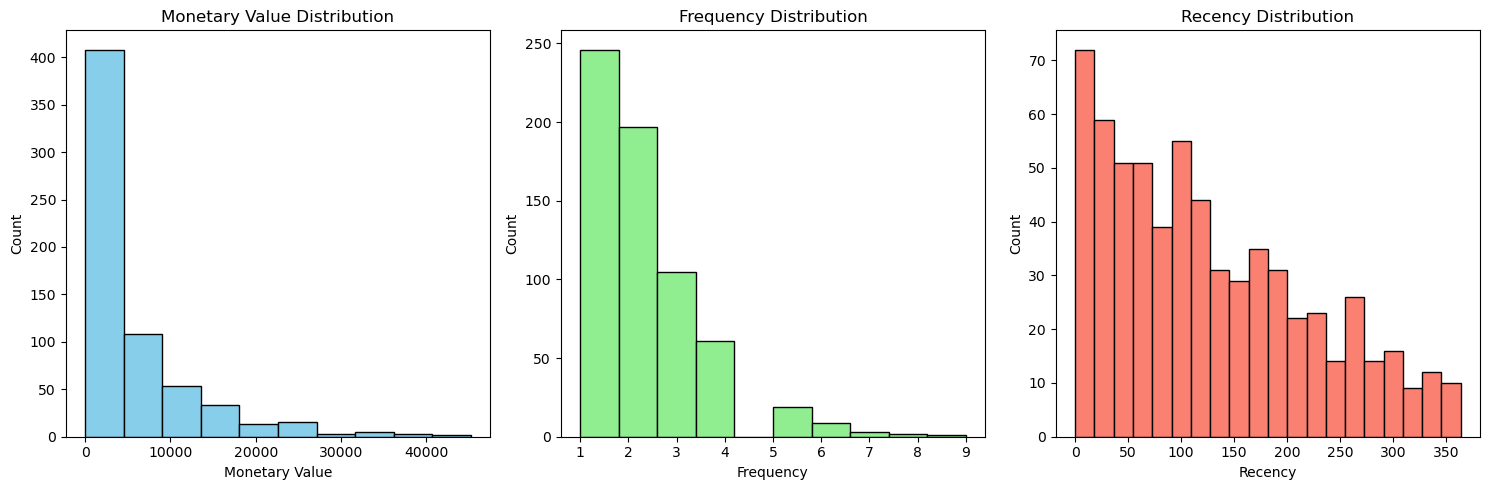

In [44]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(aggregated_df['MonetaryValue'], bins=10, color='skyblue', edgecolor='black')
plt.title('Monetary Value Distribution')
plt.xlabel('Monetary Value')
plt.ylabel('Count')

plt.subplot(1, 3, 2)
plt.hist(aggregated_df['Frequency'], bins=10, color='lightgreen', edgecolor='black')
plt.title('Frequency Distribution')
plt.xlabel('Frequency')
plt.ylabel('Count')

plt.subplot(1, 3, 3)
plt.hist(aggregated_df['Recency'], bins=20, color='salmon', edgecolor='black')
plt.title('Recency Distribution')
plt.xlabel('Recency')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

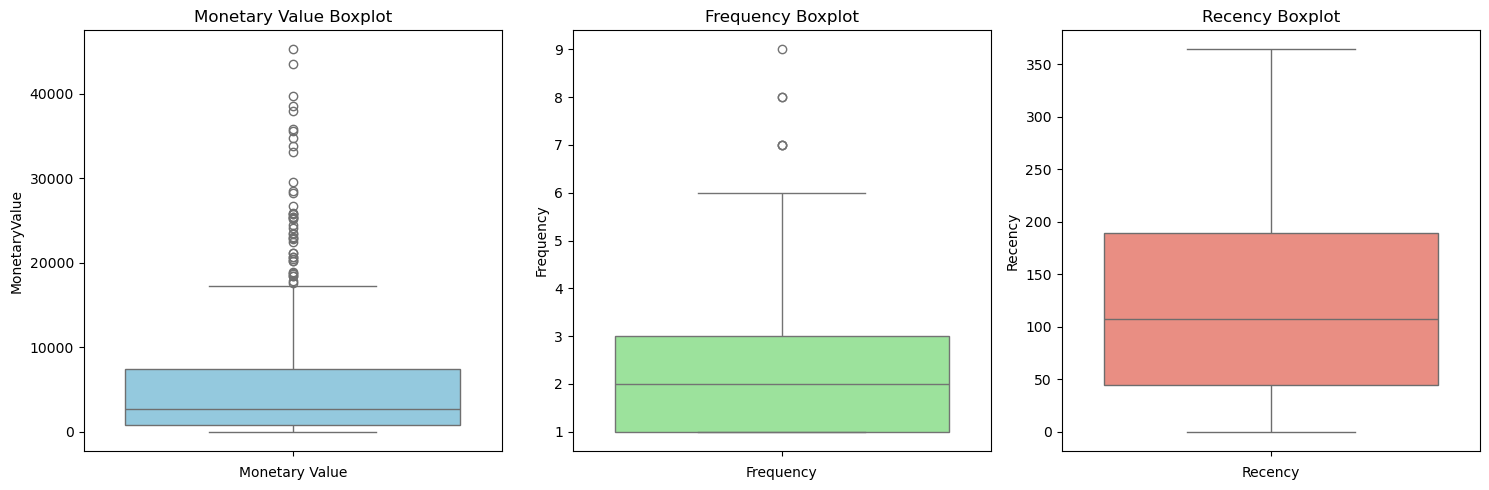

In [46]:
plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.boxplot(data=aggregated_df['MonetaryValue'], color='skyblue')
plt.title('Monetary Value Boxplot')
plt.xlabel('Monetary Value')

plt.subplot(1, 3, 2)
sns.boxplot(data=aggregated_df['Frequency'], color='lightgreen')
plt.title('Frequency Boxplot')
plt.xlabel('Frequency')

plt.subplot(1, 3, 3)
sns.boxplot(data=aggregated_df['Recency'], color='salmon')
plt.title('Recency Boxplot')
plt.xlabel('Recency')

plt.tight_layout()
plt.show()

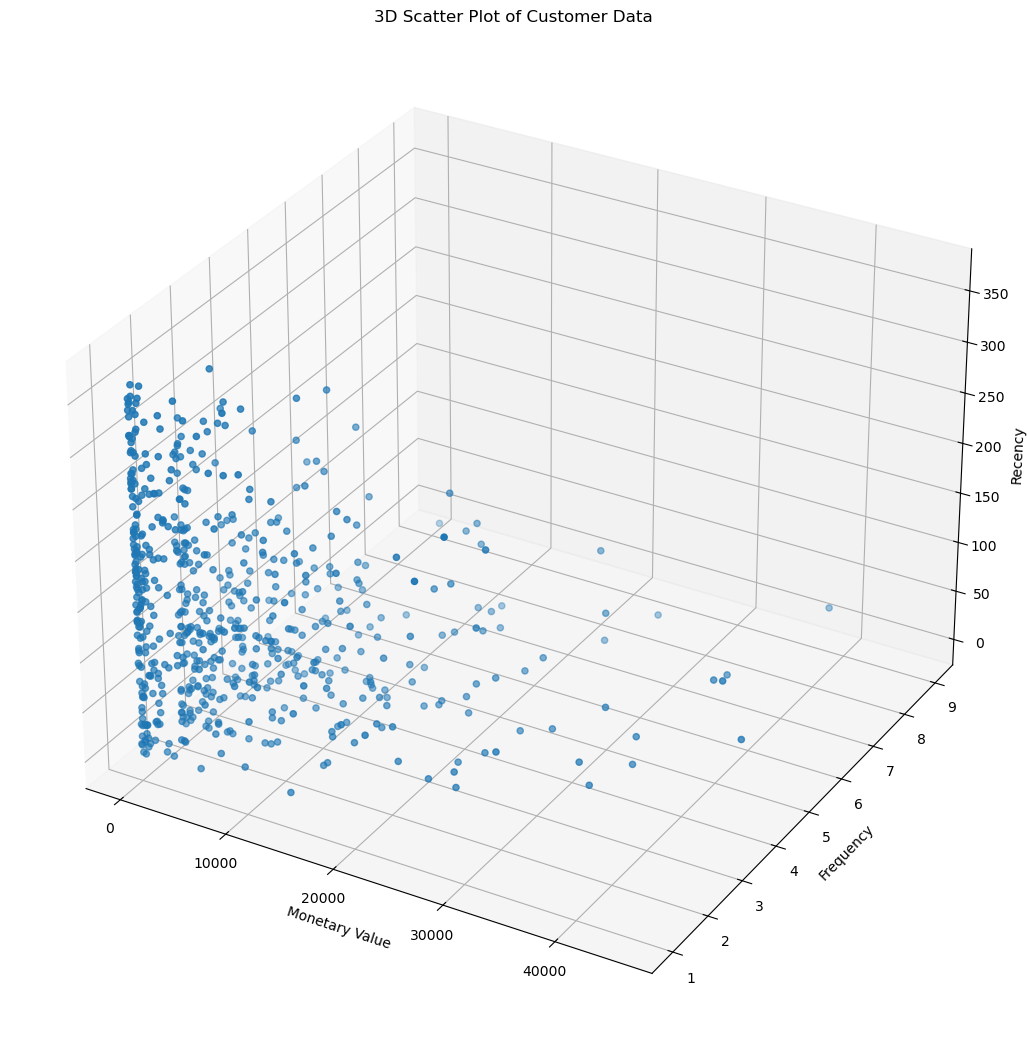

In [52]:
fig = plt.figure(figsize=(13, 19))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(aggregated_df["MonetaryValue"], aggregated_df["Frequency"], aggregated_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

In [54]:
scaler = StandardScaler()

scaled_data = scaler.fit_transform(aggregated_df[["MonetaryValue", "Frequency", "Recency"]])

scaled_data

array([[ 0.32978595, -0.12913137, -0.16427737],
       [-0.16407053, -0.12913137,  0.9764163 ],
       [-0.7586176 , -0.89794129,  1.44114335],
       ...,
       [ 0.15793651, -0.12913137,  0.57506112],
       [-0.74365783, -0.89794129,  0.59618508],
       [-0.74703199, -0.89794129, -0.22764924]])

In [58]:
scaled_data_df = pd.DataFrame(scaled_data, index=aggregated_df.index, columns=("MonetaryValue", "Frequency", "Recency"))

scaled_data_df

,MonetaryValue,Frequency,Recency
0,0.33,-0.13,-0.16
1,-0.16,-0.13,0.98
2,-0.76,-0.90,1.44
3,-0.75,-0.13,0.58
4,-0.41,0.64,-0.81
...,...,...,...
638,-0.49,0.64,0.55
639,0.07,1.41,-0.15
640,0.16,-0.13,0.58
641,-0.74,-0.90,0.60


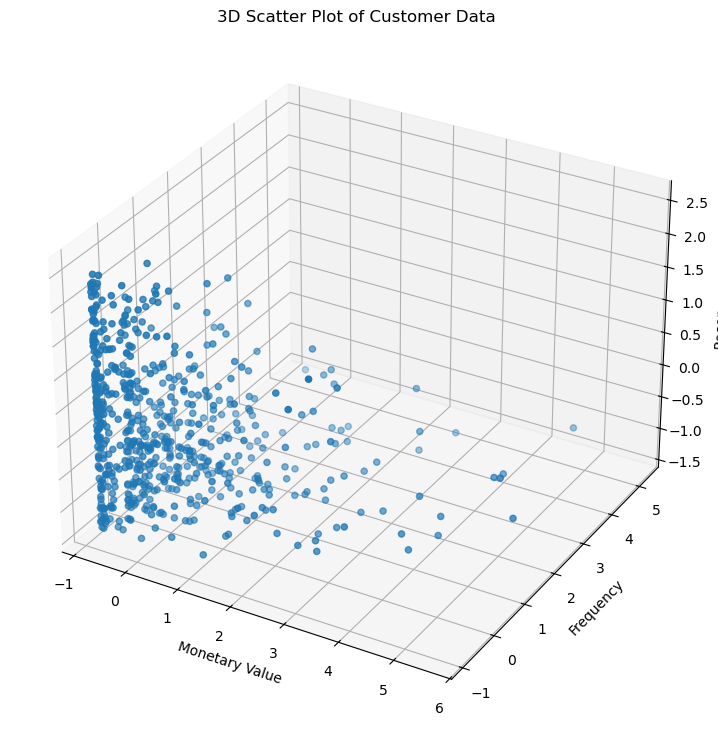

In [66]:
fig = plt.figure(figsize=(13, 9))

ax = fig.add_subplot(projection="3d")

scatter = ax.scatter(scaled_data_df["MonetaryValue"], scaled_data_df["Frequency"], scaled_data_df["Recency"])

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data')

plt.show()

## KMeans Clustering

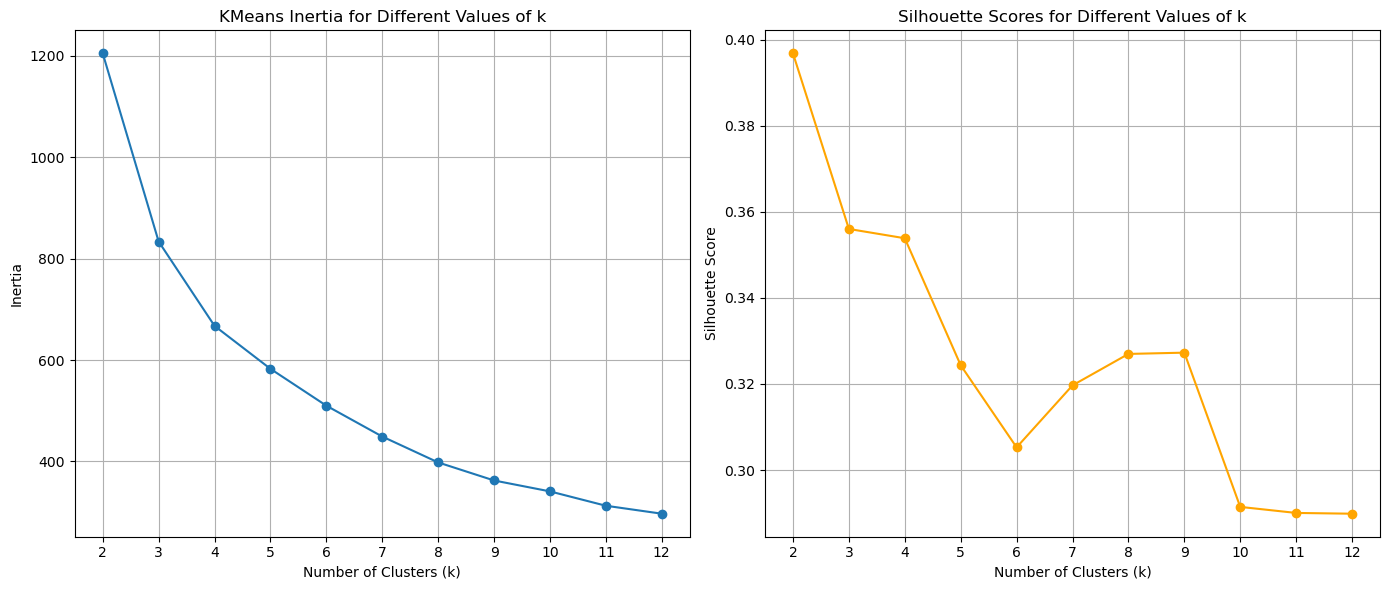

In [69]:
max_k = 12

inertia = []
silhoutte_scores = []
k_values = range(2, max_k + 1)

for k in k_values:

    kmeans = KMeans(n_clusters=k, random_state=42, max_iter=1000)

    cluster_labels = kmeans.fit_predict(scaled_data_df)

    sil_score = silhouette_score(scaled_data_df, cluster_labels)

    silhoutte_scores.append(sil_score)

    inertia.append(kmeans.inertia_)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, inertia, marker='o')
plt.title('KMeans Inertia for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.xticks(k_values)
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, silhoutte_scores, marker='o', color='orange')
plt.title('Silhouette Scores for Different Values of k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.xticks(k_values)
plt.grid(True)

plt.tight_layout()
plt.show()

In [87]:
kmeans = KMeans(n_clusters=6, random_state=42, max_iter=1000)

cluster_labels = kmeans.fit_predict(scaled_data_df)

cluster_labels

array([1, 0, 0, 0, 1, 0, 0, 1, 4, 1, 1, 2, 2, 1, 1, 3, 1, 0, 4, 4, 1, 1,
       4, 1, 0, 1, 4, 1, 1, 0, 0, 4, 4, 0, 3, 0, 1, 1, 0, 3, 0, 4, 3, 1,
       2, 3, 3, 2, 0, 1, 4, 2, 4, 1, 4, 1, 0, 1, 2, 0, 1, 4, 0, 1, 3, 3,
       4, 0, 0, 2, 2, 4, 1, 4, 3, 1, 4, 0, 3, 0, 1, 4, 4, 4, 1, 1, 4, 4,
       0, 0, 4, 1, 1, 4, 2, 1, 2, 2, 1, 2, 3, 5, 0, 4, 4, 3, 1, 1, 1, 0,
       1, 2, 4, 4, 1, 1, 4, 0, 3, 0, 1, 1, 4, 1, 4, 3, 2, 1, 4, 4, 1, 0,
       4, 2, 1, 2, 4, 4, 0, 1, 1, 0, 4, 4, 4, 0, 0, 1, 0, 0, 5, 4, 1, 0,
       4, 4, 3, 4, 1, 1, 0, 1, 1, 0, 3, 4, 5, 0, 1, 0, 0, 1, 0, 0, 4, 0,
       0, 4, 1, 0, 0, 4, 0, 4, 2, 1, 5, 1, 0, 0, 1, 5, 4, 2, 1, 2, 3, 4,
       1, 1, 1, 1, 0, 0, 4, 1, 3, 1, 1, 4, 0, 4, 0, 1, 0, 1, 4, 2, 3, 0,
       1, 3, 0, 0, 0, 0, 2, 2, 0, 1, 1, 1, 3, 0, 0, 1, 4, 4, 0, 1, 0, 3,
       0, 0, 0, 4, 5, 4, 0, 1, 4, 3, 2, 1, 4, 4, 4, 0, 4, 1, 1, 5, 5, 4,
       4, 1, 4, 1, 1, 5, 0, 4, 1, 2, 3, 0, 1, 3, 1, 1, 4, 3, 0, 4, 2, 0,
       0, 4, 2, 0, 0, 1, 4, 2, 0, 0, 3, 1, 1, 4, 0,

In [89]:
aggregated_df["Cluster"] = cluster_labels

aggregated_df

,Customer ID,MonetaryValue,Frequency,LastInvoiceDate,Recency,Cluster
0,C001,7805.04,2,2022-09-11,111,1
1,C002,4280.59,2,2022-05-26,219,0
2,C003,37.56,1,2022-04-12,263,0
3,C004,81.00,2,2022-07-03,181,0
4,C005,2547.93,3,2022-11-11,50,1
...,...,...,...,...,...,...
638,C791,1947.72,3,2022-07-05,179,1
639,C792,5921.19,4,2022-09-10,112,3
640,C793,6578.62,2,2022-07-03,181,0
641,C794,144.32,1,2022-07-01,183,0


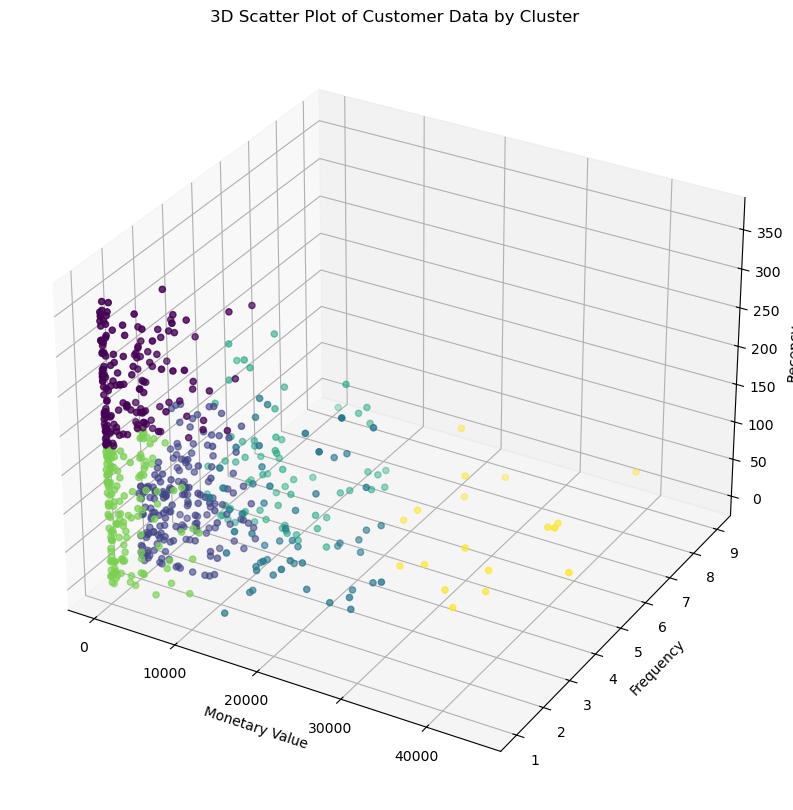

In [99]:

Clusters = aggregated_df['Cluster']
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')

scatter = ax.scatter(aggregated_df['MonetaryValue'], 
                     aggregated_df['Frequency'], 
                     aggregated_df['Recency'], 
                     c=Clusters,  # Use mapped solid colors
                     marker='o')

ax.set_xlabel('Monetary Value')
ax.set_ylabel('Frequency')
ax.set_zlabel('Recency')

ax.set_title('3D Scatter Plot of Customer Data by Cluster')

plt.show()

In [105]:
# Save the chart as an image
plt.savefig("chart.png", format="png", dpi=300)  # Adjust dpi for resolution

<Figure size 640x480 with 0 Axes>

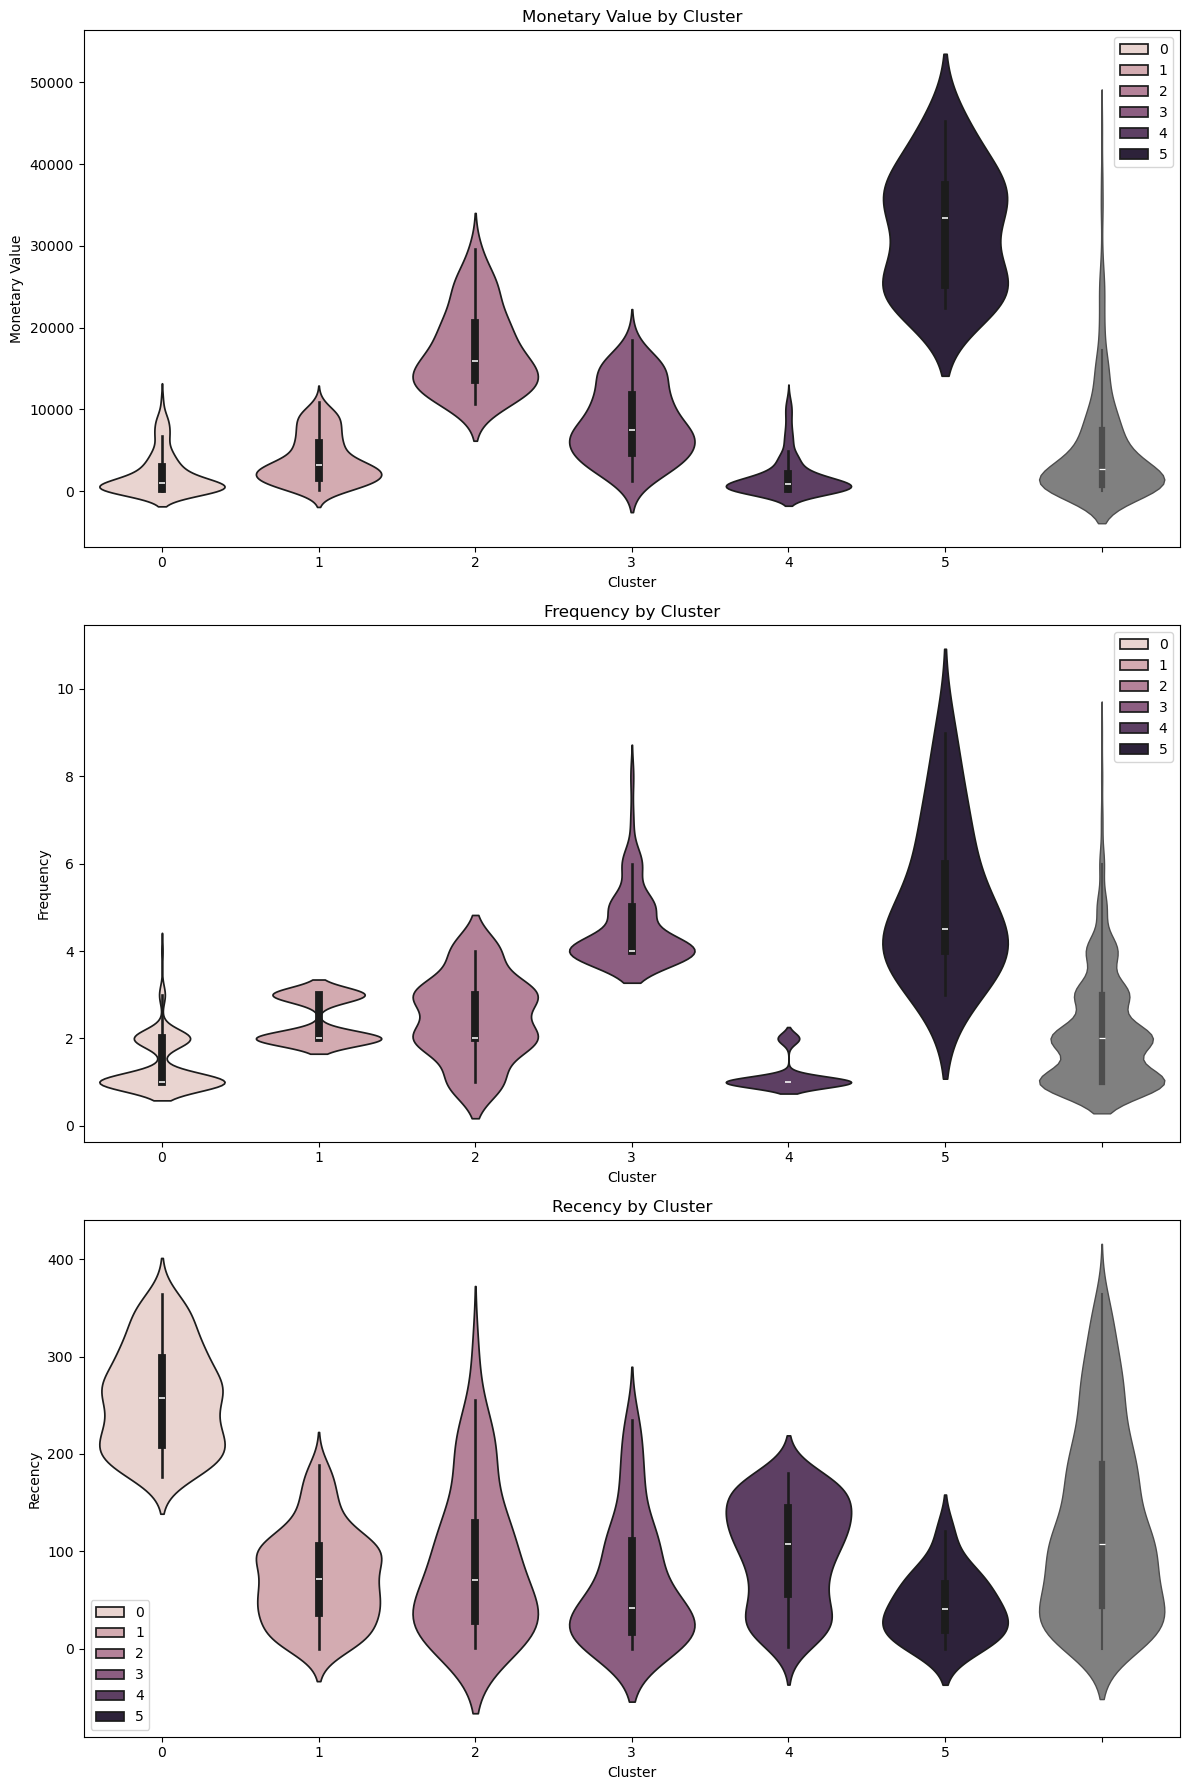

In [103]:
plt.figure(figsize=(12, 18))

plt.subplot(3, 1, 1)
sns.violinplot(x=aggregated_df['Cluster'], y=aggregated_df['MonetaryValue'], hue=aggregated_df["Cluster"])
sns.violinplot(y=aggregated_df['MonetaryValue'], color='gray', linewidth=1.0)
plt.title('Monetary Value by Cluster')
plt.ylabel('Monetary Value')

plt.subplot(3, 1, 2)
sns.violinplot(x=aggregated_df['Cluster'], y=aggregated_df['Frequency'], hue=aggregated_df["Cluster"])
sns.violinplot(y=aggregated_df['Frequency'], color='gray', linewidth=1.0)
plt.title('Frequency by Cluster')
plt.ylabel('Frequency')


plt.subplot(3, 1, 3)
sns.violinplot(x=aggregated_df['Cluster'], y=aggregated_df['Recency'], hue=aggregated_df["Cluster"])
sns.violinplot(y=aggregated_df['Recency'], color='gray', linewidth=1.0)
plt.title('Recency by Cluster')
plt.ylabel('Recency')

plt.tight_layout()
plt.show()


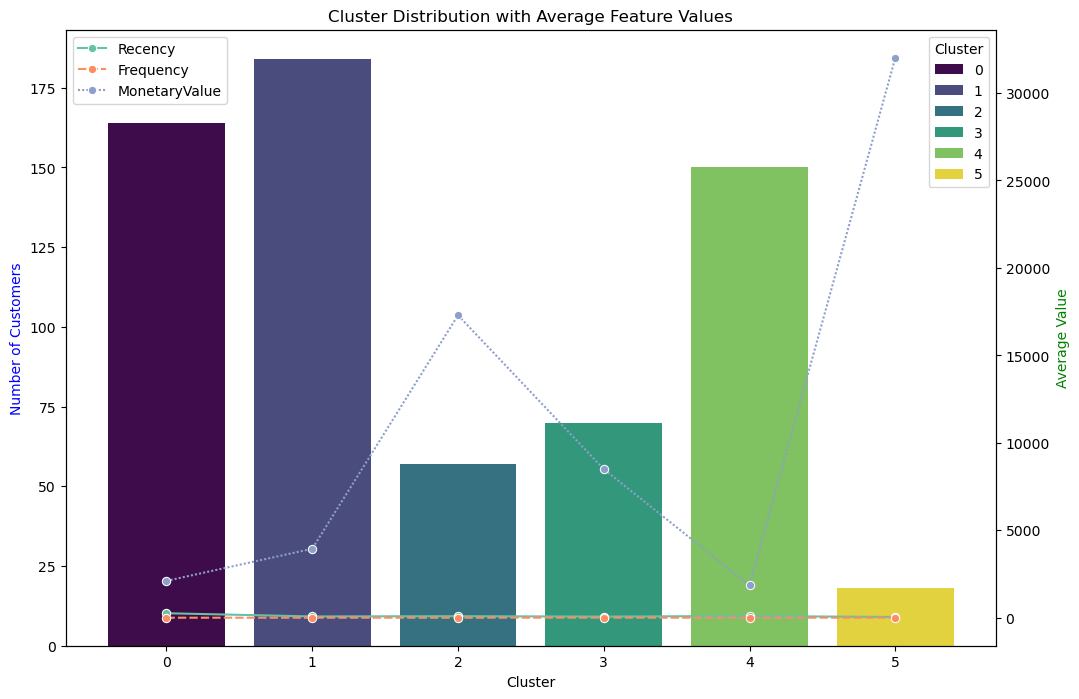

In [101]:
cluster_counts = aggregated_df['Cluster'].value_counts()

feature_means = aggregated_df.groupby('Cluster')[['Recency', 'Frequency', 'MonetaryValue']].mean()

fig, ax1 = plt.subplots(figsize=(12, 8))

sns.barplot(x=cluster_counts.index, y=cluster_counts.values, ax=ax1, palette='viridis', hue=cluster_counts.index)
ax1.set_ylabel('Number of Customers', color='b')
ax1.set_title('Cluster Distribution with Average Feature Values')

ax2 = ax1.twinx()

sns.lineplot(data=feature_means, ax=ax2, palette='Set2', marker='o')
ax2.set_ylabel('Average Value', color='g')

plt.show()